# Basic steps for checking up the behavior data

In [ ]:
import numpy as np
import pynapple as nap
import matplotlib.pyplot as plt
from scipy import signal

In [4]:
import math
# if needed
def angle_convert_func(angle):
    """
    Fast general version that handles any input angle and transforms to [-π, π]
    Handles both single values and arrays efficiently
    
    Args:
        angle: Angle(s) in radians (any value)
               Can be scalar, list, or numpy array
    
    Returns:
        Angle(s) in radians in range [-π, π]
        Returns same type as input
    """
    # Handle numpy arrays efficiently
    if isinstance(angle, np.ndarray):
        # Vectorized operations - much faster than loops
        normalized = angle % (2 * math.pi)
        result = np.where(normalized > math.pi, 
                         normalized - 2 * math.pi, 
                         normalized)
        return result
    
    # Handle lists
    elif isinstance(angle, (list, tuple)):
        angle = np.array(angle)

        normalized = angle % (2 * math.pi)
        result = np.where(normalized > math.pi, 
                         normalized - 2 * math.pi, 
                         normalized)
        return result
    

    
    # Handle single values
    else:
        normalized = angle % (2 * math.pi)
        return normalized - 2 * math.pi if normalized > math.pi else normalized

In [5]:

# change this with your file path
nwt_path = '/storage/antsiro/data/others/adrien/OpenField_BlindAnesmic/OF_rd1/KA55-200305.nwb'

# for csv file, you can use pandas to read it

# eg
#csv_path = 'your_path/your_file.csv'
# you need to check the header of the csv file to decide whether you want to skiprows 
# raw_csv = pd.read_csv(csv_path, skiprows=[0,1,2,3,4,5],usecols=usecol, index_col=None, dtype=dtype_mapping) 

# usecol = list(range(34,58))
# usecol.extend([0,1])
# dtype_mapping = {9:np.float16, 13:np.float16, 17:np.float16,21:np.float16}

# raw_data = pd.read_csv(file_path, skiprows=[0,1,2,3,4,5],usecols=usecol, index_col=None, dtype=dtype_mapping) 

# 1. The distribution of features (x,y,z, rx, ry, rz)

/storage/antsiro/data/others/adrien/OpenField_BlindAnesmic/OF_rd1/KA55-200305.nwb


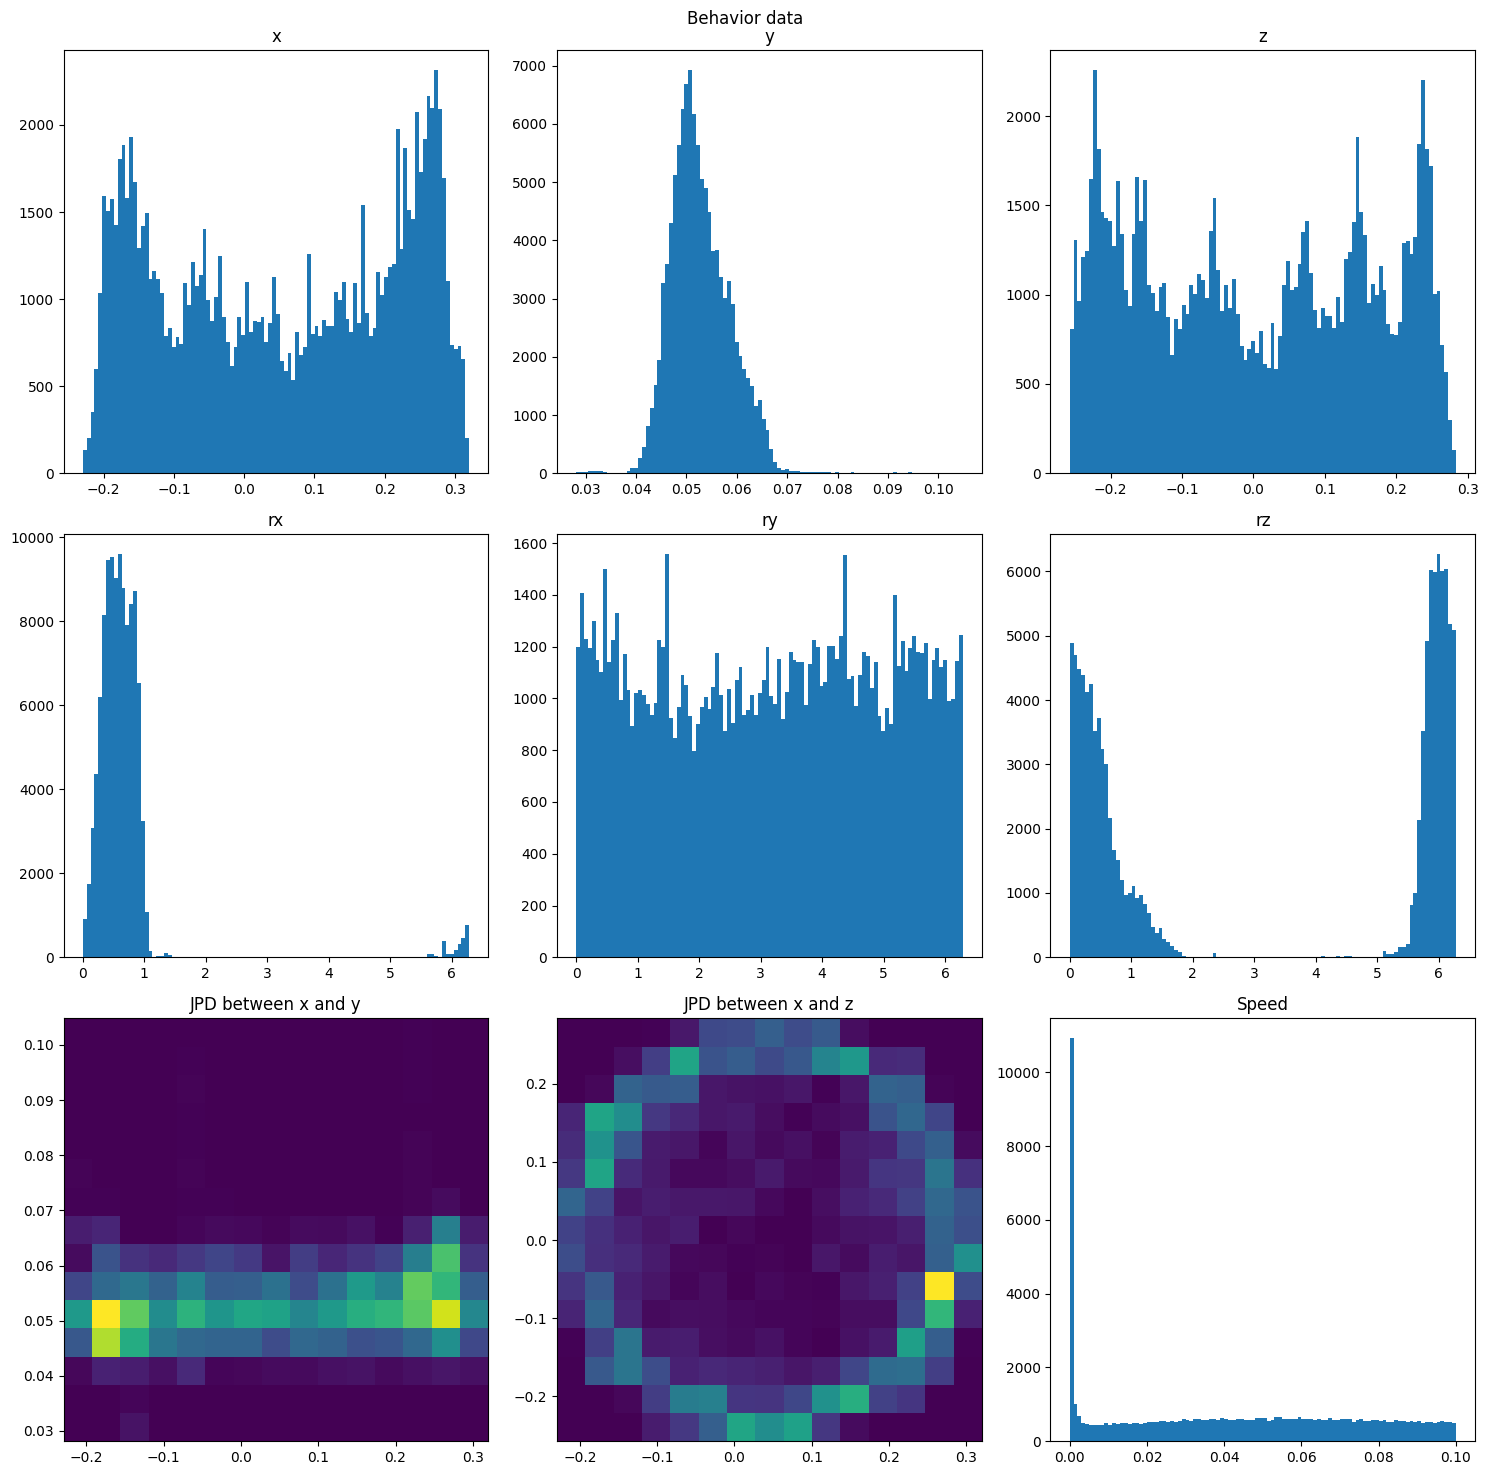

In [ ]:

print(nwt_path)
data = nap.load_file(nwt_path)
data.key_to_id

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()
for i,key in enumerate(['x','y','z','rx','ry','rz']):
    ax = axs[i]
    ax.hist(data[key], bins=100)
    ax.set_title(key)

# caculate the jpd between y and rx, rz
# calcualte JPD between x and y

axs[6].hist2d(data['x'].values, data['y'].values, bins=[15,15], range=[[np.min(data['x'].values), np.max(data['x'].values)], [np.min(data['y'].values), np.max(data['y'].values)]])
axs[6].set_title('JPD between x and y')

## jpd between x and z, you can change it to whatever combination you want 
axs[7].hist2d(data['x'].values, data['z'].values, bins=[15,15], range=[[np.min(data['x'].values), np.max(data['x'].values)], [np.min(data['z'].values), np.max(data['z'].values)]])
axs[7].set_title('JPD between x and z')

# calculate speed 
speed = np.sqrt(np.square(data['x'].values[1:]-data['x'].values[:-1]) + np.square(data['z'].values[1:]-data['z'].values[:-1]))* 120 # 120 is the frame rate
## smooth speed
# speed = signal.gaussian_filter1d(speed, 10)
axs[8].hist(speed, bins=100, range = [0,0.1])
axs[8].set_title('Speed')



# heatmap2 = hist2(data['y'].values, data['rx'].values, axs[7], bins=[15,15], ranges=[[np.min(data['y'].values), np.max(data['y'].values)], [np.min(data['rx'].values), np.max(data['rx'].values)]], labels=['y', 'rx'], whether_log=False)
# heatmap3 = hist2(data['y'].values, data['rz'].values, axs[8], bins=[15,15], ranges=[[np.min(data['y'].values), np.max(data['y'].values)], [np.min(data['rz'].values), np.max(data['rz'].values)]], labels=['y', 'rz'], whether_log=False)
fig.suptitle('Behavior data')
plt.tight_layout()





# 2. the alignmence between yaw and movement direction 

/storage/antsiro/data/others/adrien/OpenField_BlindAnesmic/OF_rd1/KA55-200305.nwb


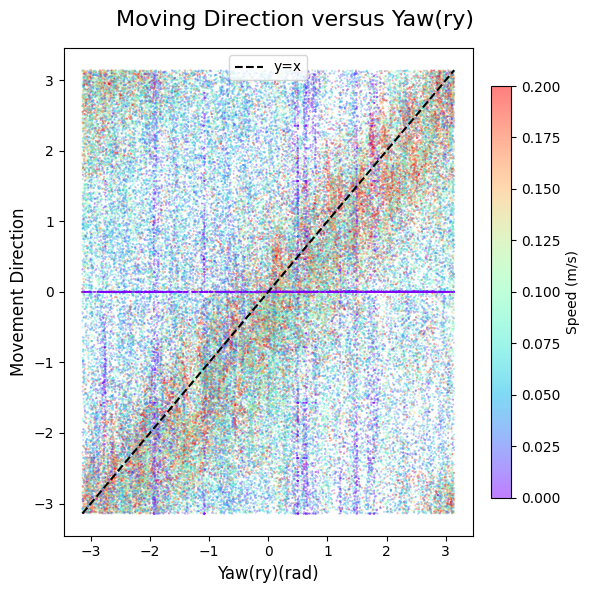

In [ ]:


fig,axs = plt.subplots(1, 1, figsize=(6,6))

print(nwt_path)
data = nap.load_file(nwt_path)
data.key_to_id

x = data['x'].values
y = data['y'].values
z = data['z'].values
rx = data['rx'].values
ry = data['ry'].values
rz = data['rz'].values

direction = -np.arctan2(np.diff(z), np.diff(x))
speed2d = np.sqrt(np.diff(x)**2 + np.diff(z)**2) * 120 # 120 is frame /sec, 
speed2d[speed2d > 0.2] = 0.2 # for visualization 

# Use k instead of i (which was undefined)
this_plot = axs.scatter(angle_convert_func(ry[1:]), direction, c=speed2d, s=0.1, cmap='rainbow', alpha=0.5)
axs.plot([-np.pi, np.pi], [-np.pi, np.pi], 'k--', label='y=x')
axs.set_xlabel('Yaw(ry)(rad)', fontsize=12)
axs.set_ylabel('Movement Direction', fontsize=12)
# axs.set_title(f'{titles[k]}: {basename(nwt_path).replace(".nwb", "")}', fontsize=14)
axs.legend()
fig.colorbar(this_plot, ax=axs, label='Speed (m/s)', fraction=0.046, pad=0.04)



fig.suptitle('Moving Direction versus Yaw(ry)', fontsize=16)
fig.tight_layout()
plt.show()

# 3. The flipping of markers

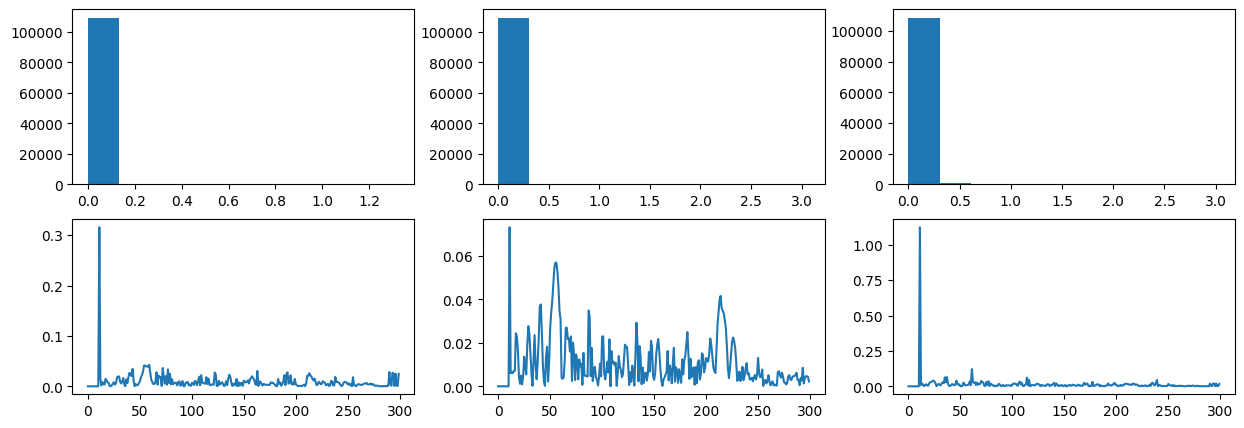

In [ ]:




x = data['x'].values
y = data['y'].values
z = data['z'].values
rx = data['rx'].values
ry = data['ry'].values
rz = data['rz'].values


fig, axs = plt.subplots(2,3, figsize=(15,5))

# df = pd.read_csv(file, header=[5]) 
for i, key in enumerate(['rx', 'ry', 'rz']):
    this_value = data[key].values
    diff_value = np.abs(angle_convert_func(np.diff(this_value)))
    axs[0,i].hist(diff_value)

    # Find the indices where the magnitude of diff_x is greater than a certain threshold, you can decide the threshold based on the distribution
    index = np.argwhere(np.abs(diff_value) > 10).reshape(-1)

    #visualize diff
    axs[1,i].plot(diff_value[0:300])
    # axs[1,i].plot(this_value[index[0]-100:index[1]+101])